In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


## *In this notebook, I have tried to find the skewness of variables and normalize those which has high skewness. Explored and found the use of Box Cox function which I have explained a bit and also given the reference links which helped me understand it*

## Importing Dataset

In [2]:
dataset=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
print(dataset.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


## Checking Skewness of some variables.

Variables to check:
* GRE Score
* TOEFL Score
* CGPA
* Chance of Admit (Target Variable)

Data with less amount of skewness is more suitable for predictive models.

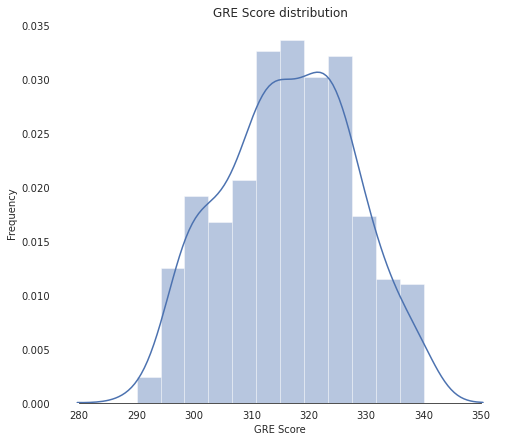

skew value:  -0.03972223277299966


In [3]:
# to check skewness of GRE Score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the distribution 
sns.distplot(dataset['GRE Score'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="GRE Score")
ax.set(title="GRE Score distribution")
sns.despine(trim=True, left=True)
plt.show()


print("skew value: ", skew(dataset['GRE Score']))

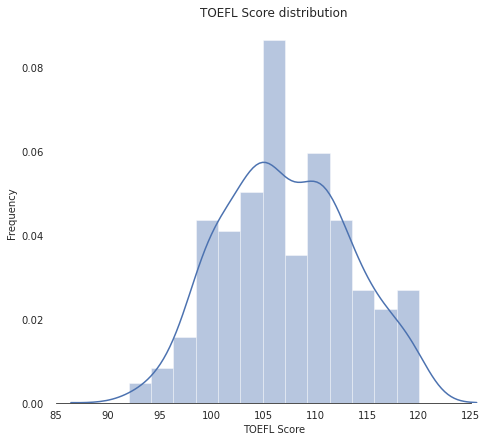

skew value:  0.09531393010261811


In [4]:
# to check skewness of TOEFL Score
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the distribution 
sns.distplot(dataset['TOEFL Score'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="TOEFL Score")
ax.set(title="TOEFL Score distribution")
sns.despine(trim=True, left=True)
plt.show()

print("skew value: ", skew(dataset['TOEFL Score']))

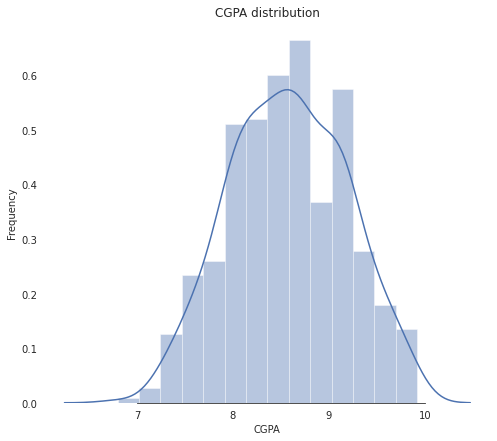

skew value:  -0.02653261314181717


In [5]:
# to check skewness of CGPA
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the distribution 
sns.distplot(dataset['CGPA'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="CGPA")
ax.set(title="CGPA distribution")
sns.despine(trim=True, left=True)
plt.show()

print("skew value: ", skew(dataset['CGPA']))

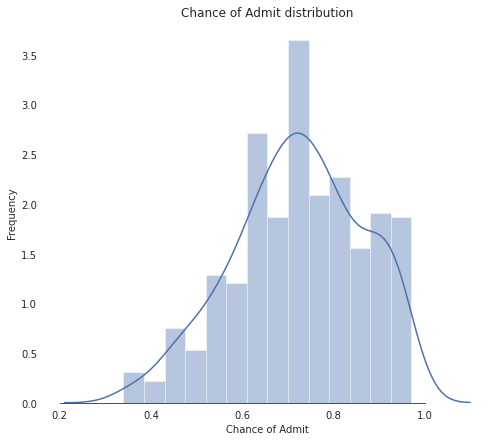

skew value:  -0.28909558547899383


In [6]:
# to check skewness of target variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the distribution 
sns.distplot(dataset['Chance of Admit '], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Chance of Admit")
ax.set(title="Chance of Admit distribution")
sns.despine(trim=True, left=True)
plt.show()

print("skew value: ", skew(dataset['Chance of Admit ']))

## Box-Cox Method to approximate Normal Distribution of Data

Now for the target variable skew is -0.28. Lets try to bring this value in range (-0.1,0.1)

Here boxcox function from scipy.stats library is used to normalize the skewness in the Target Variable. 

Mathematical form:
![Mathematical form](https://drive.google.com/uc?export=view&id=1nSCIZVNTbDWlGgDhbXPzMStnkcNp7AAK)

The lambda variable varies from -5 to 5 and the value is calculated for each parameter. Optimal value is considered which would give the best approximation of a normal distribution curve.

Reference links:
* [Statistic How To Article](https://www.statisticshowto.com/box-cox-transformation/)
* [Towards Data Science Article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45)

-0.07062551178512048


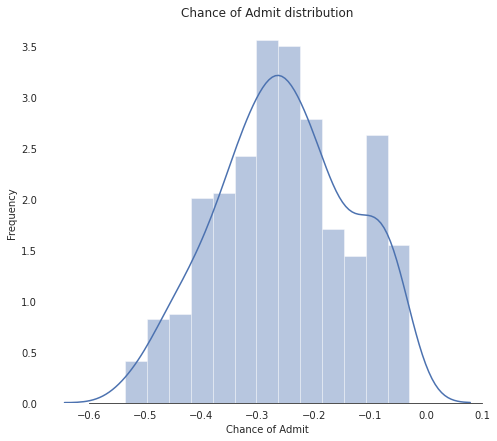

In [7]:
# we need to normalize the target variable
from scipy import stats

crim_box=stats.boxcox(dataset['Chance of Admit '])[0]
print(skew(crim_box))


# to check skewness of target variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(crim_box, color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Chance of Admit")
ax.set(title="Chance of Admit distribution")
sns.despine(trim=True, left=True)
plt.show()

In [8]:
dataset['Chance of Admit ']=crim_box
print("skew value: ", skew(dataset['Chance of Admit ']))

skew value:  -0.07062551178512048


## Splitting the Dataset

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y=dataset[dataset.columns[8]].values;
X=dataset[dataset.columns[[1,2,3,4,5,6,7]]].values

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(500, 7)
(500,)
(400, 7)
(100, 7)


## Training and Testing Different Models

### 1. Random Forest Regressor

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
model=RandomForestRegressor()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test,y_test))


#print(y_pred)
#print(y_test)
#print(accuracy_score(y_pred,y_test))

print("MSE: ", mean_squared_error(y_pred,y_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_pred,y_test)))

Accuracy:  0.8636325514502782
MSE:  0.002142073621084268
RMSE:  0.04628254121247307


### 2. Linear Regression

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test,y_test))


#print(y_pred)
#print(y_test)
#print(accuracy_score(y_pred,y_test))

print("MSE: ", mean_squared_error(y_pred,y_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_pred,y_test)))

Accuracy:  0.8709283447564493
MSE:  0.0020274705647666605
RMSE:  0.045027442352044166


### 3. XGB Regression

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("Accuracy: ", model.score(X_test,y_test))


#print(y_pred)
#print(y_test)
#print(accuracy_score(y_pred,y_test))

print("MSE: ", mean_squared_error(y_pred,y_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_pred,y_test)))

Accuracy:  0.8200329296830413
MSE:  0.002826940872544186
RMSE:  0.05316898412179967


### Linear Regression gives the best performance!

#### * Accuracy:  0.8709283447564493
#### * MSE:  0.0020274705647666605
#### * RMSE:  0.045027442352044166